In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\Localadmin\Anaconda3\lib\site-packages\lightfm\_lightfm_fast.py:10: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  "LightFM was compiled without OpenMP support. "


## Exploratory Data Analysis for Recommendation System

Below is a list of results derived from this notebook. The analysis here is limited as our goals are well defined and our interest is specifically in understanding the data to better encode our recommender. 


- Explore distribution of user's anime watched.
- Explore distribution of user's consumption status. 
- Explore distributions of dropped anime. 
- Explore distribution of mean user score. 

In [4]:
#Load in our data from pre-processing 
user_data = pd.read_csv("user_data")
item_data = pd.read_csv("item_data")

### User Consumption Distribution
From our preprocessing steps we have a dataset of roughly 4000 users tracking their Anime consumption and ratings. Our user's likely significantly differ in consumption, hence a good starting point for our analysis is to evaluate how much each user consumes. We can do so by looking at the count of each user score and plotting these as a histogram. This plot is provided below

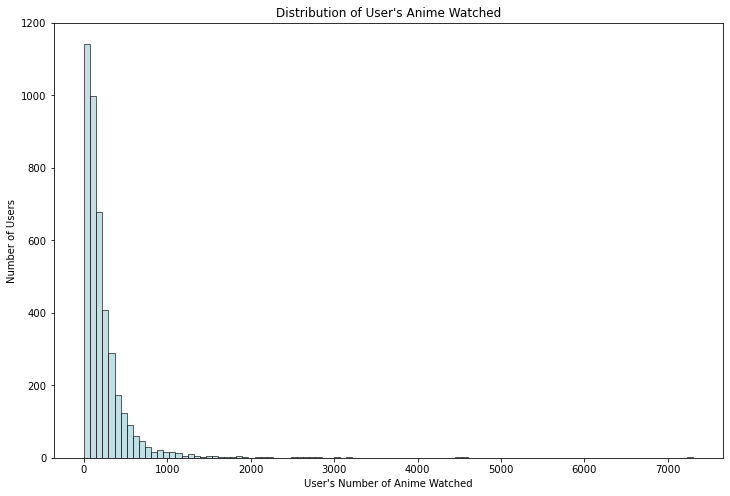

In [197]:
# Plot count of each user's number of anime watched. 
count_scores = user_data.groupby("user_id").count()
plt.figure(figsize=(12, 8))
fig = sns.histplot(count_scores['score'],color = "#ADD5DC", bins=100)
fig.set(xlabel = "User's Number of Anime Watched", ylabel = "Number of Users")
fig.set_title("Distribution of User's Anime Watched")
plt.show()

- We'll increase our granularity to get a better idea of how our users consume anime. From the plot below we see that the vast majority of the anime listed by users have already been fully completed. 

C:\Users\Localadmin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


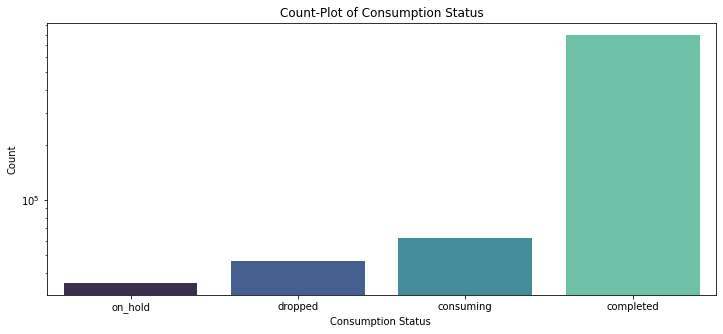

In [181]:
plt.figure(figsize=(12, 5))
fig = sns.countplot('consumption_status', data=user_data, palette= "mako", order = ["on_hold", "dropped", "consuming", "completed"])
fig.set(xlabel = "Consumption Status ", ylabel = "Count")
fig.set_title("Count Plot of Consumption Status")
fig.set_yscale("log")

### Score Distributions  
Next, we want to understand how our user's score their listed anime. The plot below depicts the distribution of scores given by the users. On the left we have a histogram of scores and on the left a cumulative distribution plot. We see that our scores are centered around 7/8 with a cutoff at 10. We can further filter by looking at the distribution by consumption status. Specifically, we will look at user’s dropped anime scores. We an see the distribution is centered around 5/6 and skewed, with a fatter tail to the left. 

C:\Users\Localadmin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


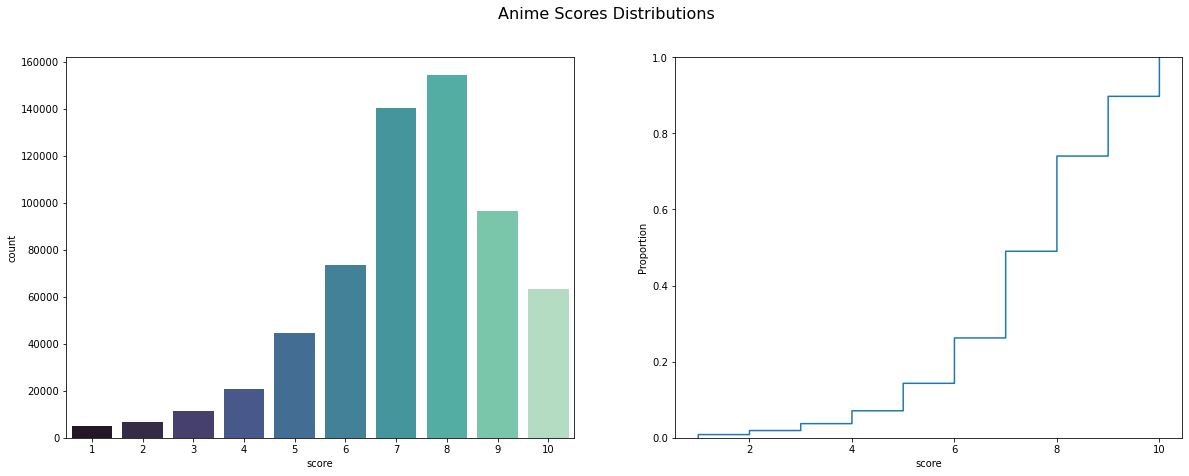

In [6]:
user_data_no_zeros = user_data[user_data["score"] != 0 ]
fig, axs = plt.subplots(ncols=2, sharex = False, sharey = False)
fig.set_figheight(7)
fig.set_figwidth(20)
plt.suptitle("Anime Scores Distributions", fontsize=16)
fig1 = sns.countplot("score", data = user_data_no_zeros, palette= "mako", ax = axs[0])
fig2 = sns.ecdfplot(data = user_data_no_zeros["score"], ax = axs[1])

C:\Users\Localadmin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='score', ylabel='Proportion'>

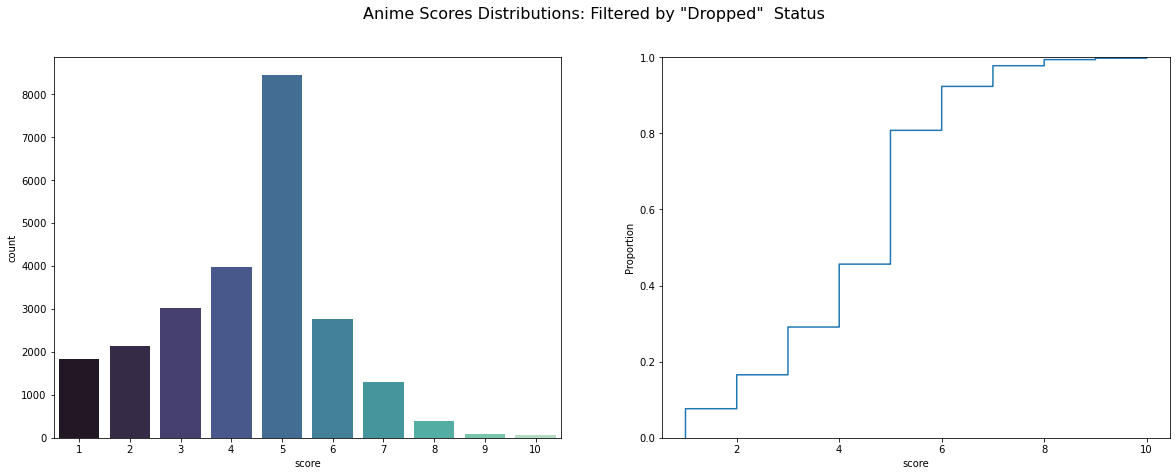

In [187]:
dropped_user_data =user_data_no_zeros[user_data_no_zeros["consumption_status"] == "dropped"]
fig, axs = plt.subplots(ncols=2, sharex = False, sharey = False)
fig.set_figheight(7)
fig.set_figwidth(20)
plt.suptitle("Anime Scores Distributions: Filtered by \"Dropped\"  Status", fontsize=16)
sns.countplot("score", data = dropped_user_data, palette= "mako", ax = axs[0])
sns.ecdfplot(data = dropped_user_data["score"], ax = axs[1])

### Feature Engineering 
An interesting user attribute to investigate may be the rate at which users continue watching anime on their list versus the rate at which they drop anime on their list. We can do so by dividing the number of anime not dropped vs the number of anime dropped and providing a histogram. This graph is provided below, a brief analysis shows the graph is extremely skewed to the left and likely follows a power-law distribution.

Text(0.5, 1.0, 'Ratio of Dropped Anime to Completed/Dropped/On-Hold')

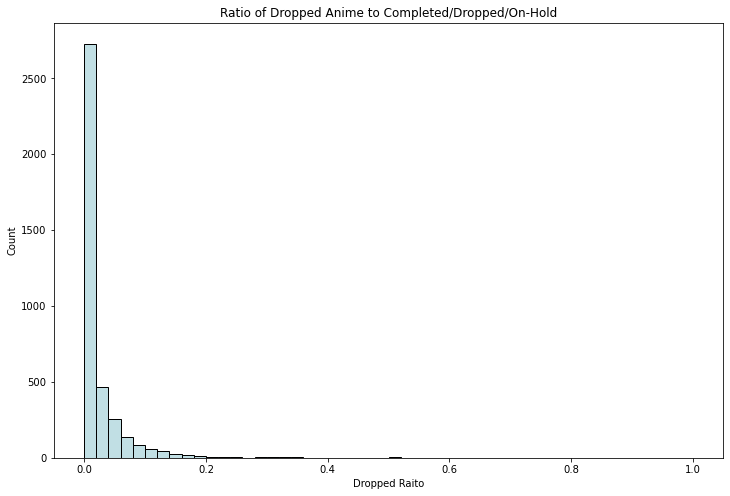

In [191]:
ratio_dropped = user_data_no_zeros.groupby("user_id").apply(lambda x: x.consumption_status[x["consumption_status"] == "dropped"].count() / x.consumption_status.count())
plt.figure(figsize=(12, 8))
fig = sns.histplot(ratio_dropped, color = "#ADD5DC", bins = 50)
fig.set(xlabel = "Dropped Raito", ylabel = "Count")
fig.set_title("Ratio of Dropped Anime to Completed/Dropped/On-Hold")

### User Mean Rating 
We've already investigated user's overall ratings but it may be useful to do some aggregation and look at an individuals mean rating. This graph is provided below. Its normally distributed except for the spike at 10. 

Text(0.5, 1.0, 'Histogram of Mean User Score')

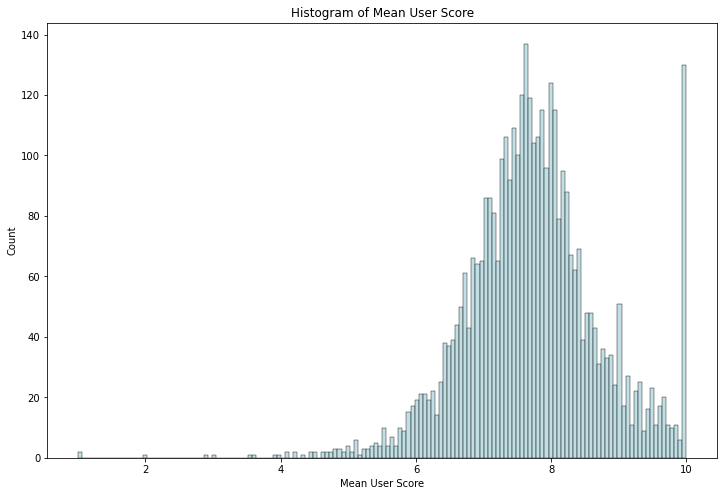

In [189]:
mean_scores = user_data_no_zeros.groupby("user_id").mean()
plt.figure(figsize=(12, 8))
fig = sns.histplot(mean_scores["score"], color = "#ADD5DC", bins = 150)
fig.set(xlabel = "Mean User Score", ylabel = "Count")
fig.set_title("Histogram of Mean User Score")

### Consumption Status of Non-Rated Anime vs. Rated Anime
A final goal of the analysis provided here is to examine the nature of non-rated anime entries in user lists. We can do so by filtering our dataset by 0 entries and comparing it to those rated non-zero. From our previous analysis in this notebook we know their is a relationship between user score's and consumption status, we can exploit this relationship to get an understanding of the score distribution of our non-rated anime. Provided below is the ratio of anime rated zero to anime rated non-zero. As well as a graph comparing the distribution of non-zero rated, and zero-rated anime across consumption status. The main observable difference in the data is that entries rated zero have a higher trend of still being consumed by user, which is consistent with our prior intuition. 

In [20]:
non_zero_count = user_data[user_data["score"] != 0 ].count()[0]
zero_count = user_data[user_data["score"] == 0 ].count()[0]
print(str(zero_count) + ":" + str(non_zero_count))

581565:615816


C:\Users\Localadmin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Localadmin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


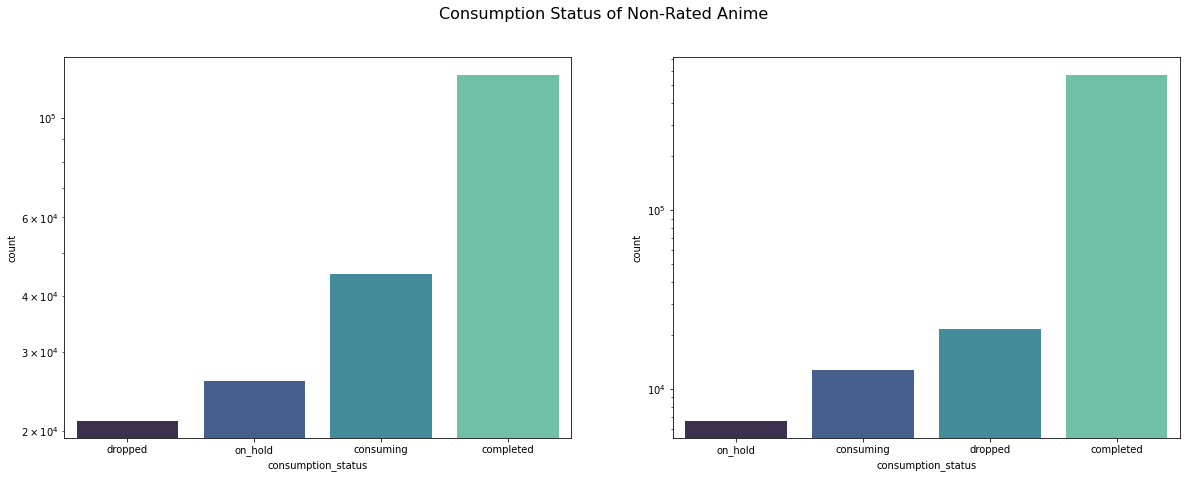

In [7]:
user_data_zeros = user_data[user_data["score"]== 0 ]
fig, axs = plt.subplots(ncols=2, sharex = False, sharey = False)
fig.set_figheight(7)
fig.set_figwidth(20)
plt.suptitle("Consumption Status of Non-Rated Anime" , fontsize=16)
fig1 = sns.countplot('consumption_status', data=user_data_zeros, palette= "mako", order = [ "dropped","on_hold", "consuming", "completed"], ax= axs[0]).set_yscale("log")
fig2 = sns.countplot('consumption_status', data=user_data_no_zeros, palette= "mako", order = [ "on_hold", "consuming","dropped", "completed"], ax = axs[1]).set_yscale("log")

### Conclusion
From our analysis here we have discovered some useful insights into how user's rate anime, which may be helpful in modeling based off of explicit feedback. We know that the majority of our users tend to rate anime positively with a mean user score of 
7.75. We know that consumption status has a strong relationship with score, with dropped status often signaling a low score. We know that the majority of the users have completed the anime if it is present on their list. 

With this information we will head to our modeling notebook which will use the python package LightFM. This package includes methods for modeling based off of both explicit and implicit data, as well as the utilization of unique loss functions, and hybrid modeling (modeling based off of both user and item features.) 